33.0
18.0
14.0
Node:0  Neighbour: 0 Nwighbour idx: []
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 34
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[[1. 0. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 0 Nwighbour idx: []
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 34
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[[0. 1. 0.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 0 Nwighbour idx: []
Self[[0. 0. 1.]]
Neighbour:[[0. 0. 0.]]
Const:0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0. 0. 1.]]
Neigh

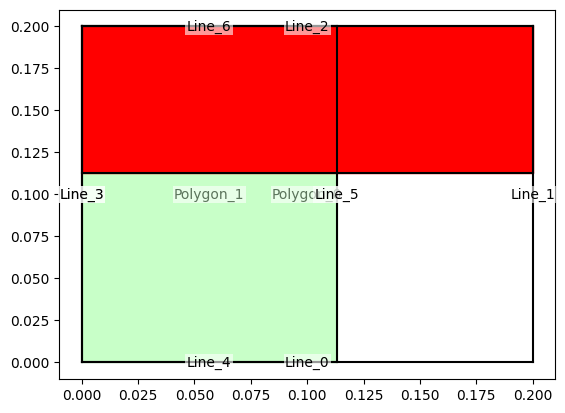

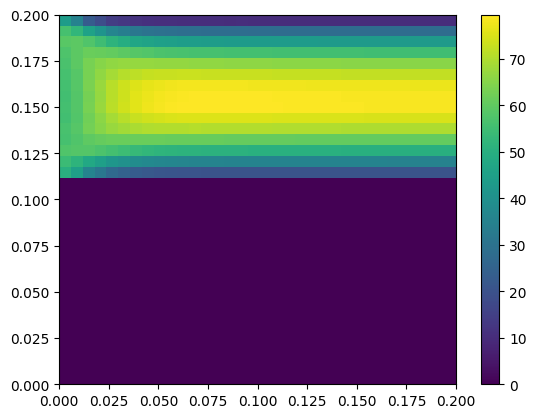

In [22]:
import fluid_fvm.physics as ph
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms
import fluid_fvm.discretization as dc
import fluid_fvm.mp_coupling as mp
import fluid_fvm.solver as sol
import numpy as np

a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.113,0),geo.Vector(0.113,0.2), geo.Vector(0,0.2)])])
a.assemble()
fig, ax = plt.subplots()

a.plot(ax, labels=True)

mesh_c_full = ms.RectangularSnappingConfig(35,35)
mat = pr.Material("test", mu = 1, rho = 156, gamma = 1,color = "#ffbbcc")
mat2 = pr.Material("test2", mu = 1, rho = 1056, gamma = 1, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a)
comp.assignMaterial("Polygon_0", mat)
comp.assignMaterial("Polygon_1", mat2)
comp.setMesh(mesh_c_full)

valid_polygon = geo.Polygon([geo.Vector(0.113,0), geo.Vector(0.2,0), geo.Vector(0.2,0.2), geo.Vector(0,0.2), geo.Vector(0,0.139),geo.Vector(0.113,0.139)])
valid_polygon = geo.Polygon([geo.Vector(0,0.113),geo.Vector(0,0.2),geo.Vector(0.2,0.2),geo.Vector(0.2,0.113), ])
valid_polygon.plot(ax, color="red")

bcdictStokes = {"Line_0" : ph.Boundary("No_slip", 0),
          "Line_1" : ph.Boundary("Pressure_outlet", 2),
          "Line_2" : ph.Boundary("No_slip", 0),
          "Line_3" : ph.Boundary("Velocity_inlet", 55),
          "Line_5" : ph.Boundary("No_slip", 0),
          "Line_6" : ph.Boundary("No_slip", 0),}


c = ph.StokesFlow(a, bcdictStokes)
phys = mp.PartialSolution(c, valid_polygon, 3)
comp.setPhysics(phys)
disc = dc.LinearFullDiscretizerMultiphysics(comp,3)
disc.discretize()
#plt.spy(disc.Amrx)
res_math = np.linalg.solve(disc.Amrx, disc.Bmrx)




res = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res[mesh_c_full.math2geoVolume(i)] = res_math[i]

mesh_y = np.zeros(mesh_c_full.volumeMesh.shape)

mesh_x = np.zeros(mesh_c_full.volumeMesh.shape)

for iy, ix in np.ndindex(mesh_c_full.volumeMesh.shape):
    thispoint = mesh_c_full.volumeMesh[iy,ix]
    mesh_x[iy,ix] = thispoint.x
    mesh_y[iy,ix] = thispoint.y


res_u = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_u[mesh_c_full.math2geoVolume(i)] = res_math[i*3]

res_v = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_v[mesh_c_full.math2geoVolume(i)] = res_math[i*3+1]

fig, ax = plt.subplots()

pl = plt.pcolormesh(mesh_x, mesh_y,res_u)
fig.colorbar(pl,)


Node:0  Neighbour: 0 Nwighbour idx: []
Self[[0.]]
Neighbour:0
Const:0.0
---------------
Node:0  Neighbour: 1 Nwighbour idx: 1
Self[[0.98906819]]
Neighbour:[[-0.98906819]]
Const:0
---------------
Node:0  Neighbour: 2 Nwighbour idx: 34
Self[[1.01105263]]
Neighbour:[[-1.01105263]]
Const:0
---------------
Node:0  Neighbour: 3 Nwighbour idx: []
Self[[1.97813639]]
Neighbour:0
Const:[[19.78136387]]
---------------
Node:1  Neighbour: 0 Nwighbour idx: []
Self[[0.]]
Neighbour:0
Const:0.0
---------------
Node:1  Neighbour: 1 Nwighbour idx: 2
Self[[0.98906819]]
Neighbour:[[-0.98906819]]
Const:0
---------------
Node:1  Neighbour: 2 Nwighbour idx: 35
Self[[1.01105263]]
Neighbour:[[-1.01105263]]
Const:0
---------------
Node:1  Neighbour: 3 Nwighbour idx: 0
Self[[0.98906819]]
Neighbour:[[-0.98906819]]
Const:0
---------------
Node:2  Neighbour: 0 Nwighbour idx: []
Self[[0.]]
Neighbour:0
Const:0.0
---------------
Node:2  Neighbour: 1 Nwighbour idx: 3
Self[[0.98906819]]
Neighbour:[[-0.98906819]]
Const:0


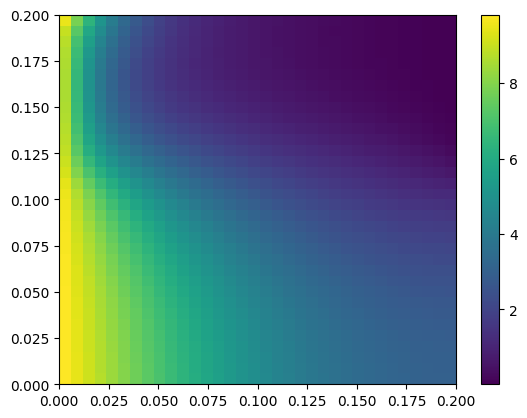

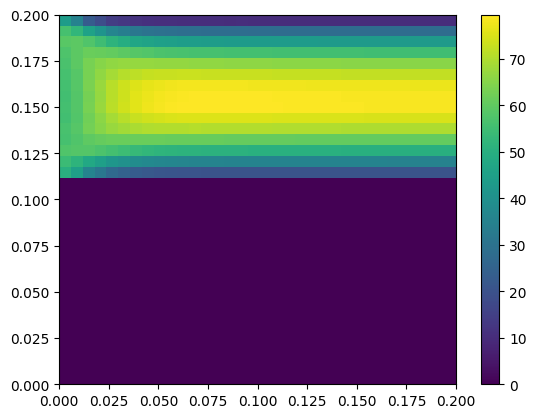

In [23]:
res_u = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_u[mesh_c_full.math2geoVolume(i)] = res_math[i*3]

res_v = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_v[mesh_c_full.math2geoVolume(i)] = res_math[i*3+1]

res_vectors = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum), dtype=geo.Vector)
for iy, ix in np.ndindex(res_vectors.shape):
        res_vectors[iy,ix] = geo.Vector(res_u[iy,ix], res_v[iy,ix])
bcdictHT = {"Line_0" : ph.Boundary("Neumann", 0),
          "Line_1" : ph.Boundary("Neumann", 0),
          "Line_3" : ph.Boundary("Dirichlet", 10),
          "Line_2" : ph.Boundary("Neumann", 0),}
comp.setPhysics(ph.HeatTransferFull(a,bcdictHT))
disc2 = dc.LinearFullParametricDiscretizetion(comp,1)
disc2.discretize(param=res_vectors)

res_math_T = np.linalg.solve(disc2.Amrx, disc2.Bmrx)


res_t = np.zeros((mesh_c_full.vyNum, mesh_c_full.vxNum))
for i in range(mesh_c_full.getVolumeNodeNum()):
        res_t[mesh_c_full.math2geoVolume(i)] = res_math_T[i]
pl = plt.pcolormesh(mesh_x, mesh_y,res_t)
fig.colorbar(pl,)
fig, ax = plt.subplots()

pl = plt.pcolormesh(mesh_x, mesh_y,res_u)
fig.colorbar(pl,)

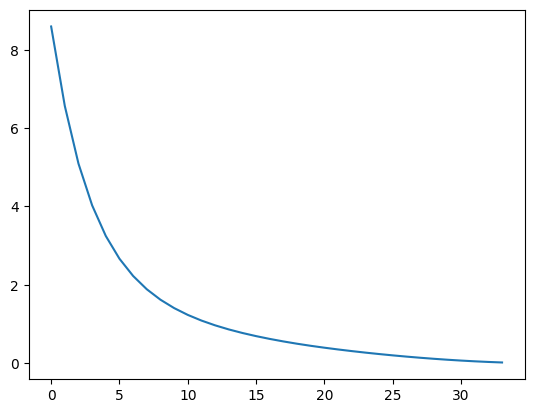

In [26]:
plt.plot(res_t[-5,:])